## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from sklearn import datasets

Using TensorFlow backend.


## 先用隨機森林(回歸樹)應用在波士頓房價

In [2]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=42)

clf = RandomForestRegressor(n_estimators=10, #決策樹的數量
                            criterion="mse",
                            max_features="auto", #如何選取 features
                            #max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=1, 
                            random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
print("Train Mean squared error:(交叉驗證) %.2f" %cross_val_score(clf, x_train, y_train, cv=5).mean())
print("Test Mean squared error: %.2f" %mean_squared_error(y_test, clf.predict(x_test)))

Train Mean squared error:(交叉驗證) 0.83
Test Mean squared error: 4.58


In [18]:
for i,v in enumerate(clf.feature_importances_):
    print(boston.feature_names[i]+':  %.5f' % v)

CRIM:  0.04642
ZN:  0.00101
INDUS:  0.00479
CHAS:  0.00254
NOX:  0.01904
RM:  0.52174
AGE:  0.00999
DIS:  0.06047
RAD:  0.00291
TAX:  0.01686
PTRATIO:  0.01289
B:  0.01001
LSTAT:  0.29134


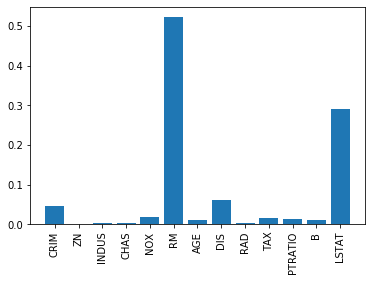

In [19]:
plt.bar([x for x in range(len(clf.feature_importances_))], clf.feature_importances_ )
plt.xticks([x for x in range(len(clf.feature_importances_))], boston.feature_names, rotation='vertical')
plt.show()

## 用隨機森林(分類樹)應用在酒分類

In [20]:
wine = datasets.load_wine()
X_w = pd.DataFrame(wine.data, columns=[wine.feature_names])
X_w

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [21]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X_w, wine.target, test_size=0.1, random_state=42)

clf_w = RandomForestClassifier(n_estimators=10, #決策樹的數量
                               criterion="gini",
                               max_features="auto", #如何選取 features
                               #max_depth=10,
                               min_samples_split=2,
                               min_samples_leaf=1, 
                               random_state=42)
clf_w.fit(x_train_w, y_train_w)

y_pred_w = clf_w.predict(x_test_w)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Train acc(交叉驗證平均)：', cross_val_score(clf_w, x_train_w, y_train_w, cv=5).mean())
print('Test acc：', accuracy_score(y_test_w, clf_w.predict(x_test_w)))

Train acc(交叉驗證平均)： 0.9625
Test acc： 0.9444444444444444


In [23]:
for i,v in enumerate(clf_w.feature_importances_):
    print(wine.feature_names[i]+':  %.5f' % v)

alcohol:  0.10593
malic_acid:  0.03572
ash:  0.00484
alcalinity_of_ash:  0.04686
magnesium:  0.03427
total_phenols:  0.07024
flavanoids:  0.22542
nonflavanoid_phenols:  0.00831
proanthocyanins:  0.02708
color_intensity:  0.13004
hue:  0.03534
od280/od315_of_diluted_wines:  0.10333
proline:  0.17263


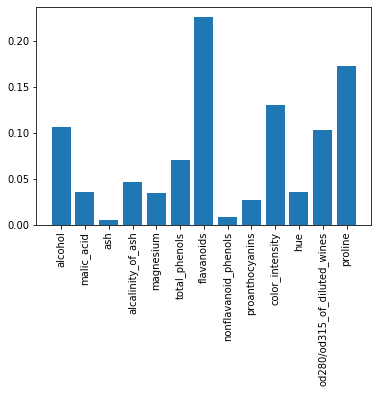

In [24]:
plt.bar([x for x in range(len(clf_w.feature_importances_))], clf_w.feature_importances_ )
plt.xticks([x for x in range(len(clf.feature_importances_))], wine.feature_names, rotation='vertical')
plt.show()

### 與HW_42相比，在兩個資料集中，隨機森林在test預測上的表現皆比一般決策樹好